DSAI 3201 Machine Learning Project: Indoor Localization Using WLAN Fingerprinting

In [1]:
%pip install seaborn

In [2]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv("trainingData.csv")
data

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [4]:
# Check  missing values
missing_values = (data == 0).sum()
missing_values

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64

In [5]:
# Remove rows with any missing values
clean_data = data.dropna()

# Remove columns with any missing values
clean_data = data.dropna(axis=1)
clean_data

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [4]:
# Select WAP columns for processing
wap_columns = [col for col in data.columns if 'WAP' in col]

# Step 1: Replace 100 values with -105(weak signal) for the WAP columns
data[wap_columns] = data[wap_columns].replace(100, -105)
# Display the first few rows after preprocessing
data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-105,-105,-97,-105,-105,...,-105,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


Exploratory Data Analysis

In [7]:
##information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [8]:
##the shape of the dataset
data.shape

(19937, 529)

In [9]:
##summary description of the dataset
data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,-104.991273,-104.983699,-105.0,-105.0,-104.974971,-104.702563,-104.323118,-104.218589,-104.188042,-104.941666,...,-105.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,0.292228,0.531403,0.0,0.0,0.566261,2.590441,4.377768,4.533137,4.955450,0.915116,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,-93.000000,-86.000000,-105.0,-105.0,-89.000000,-58.000000,-47.000000,-61.000000,-50.000000,-84.000000,...,-105.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


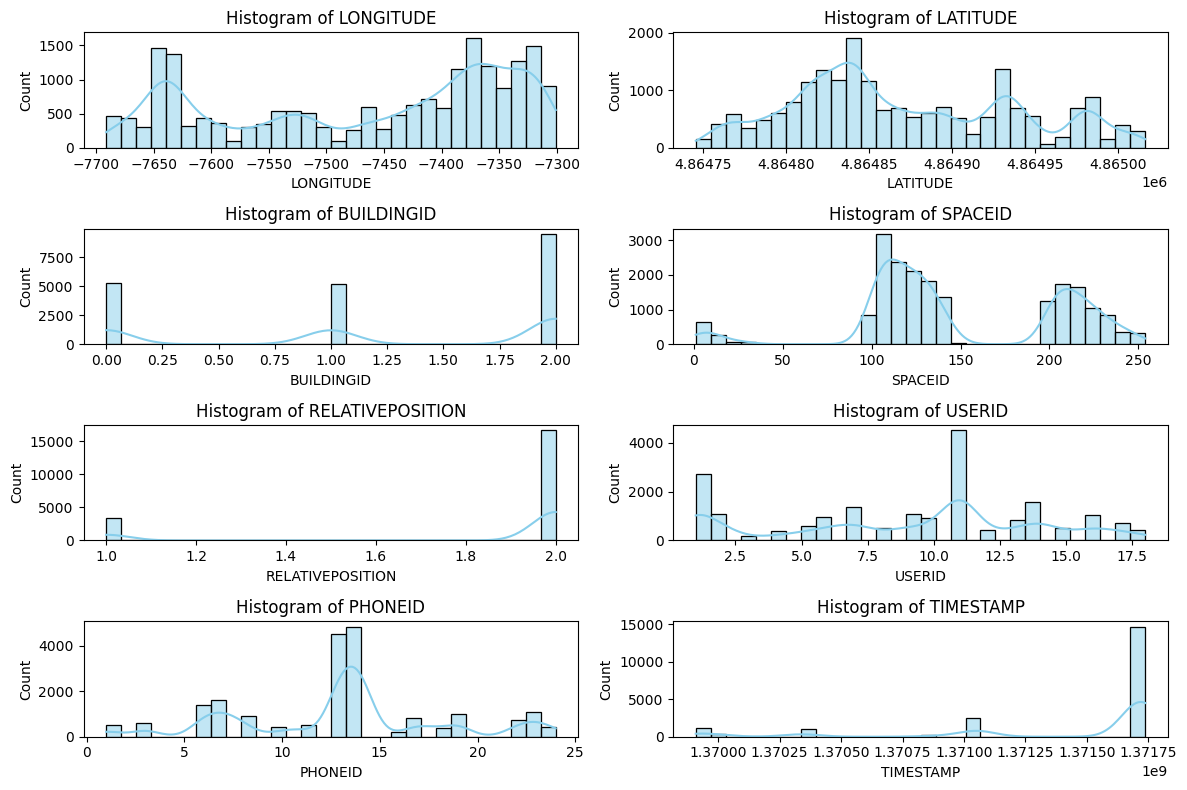

In [10]:
# Histograms for selected features
selected_features = ['LONGITUDE', 'LATITUDE', "BUILDINGID", "SPACEID", 
                   "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

plt.figure(figsize=(12, 8))

# Loop through selected features and create histograms
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 2, i) 
    sns.histplot(data[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"Histogram of {feature}")

plt.tight_layout() 
plt.show()

<Figure size 1200x800 with 0 Axes>

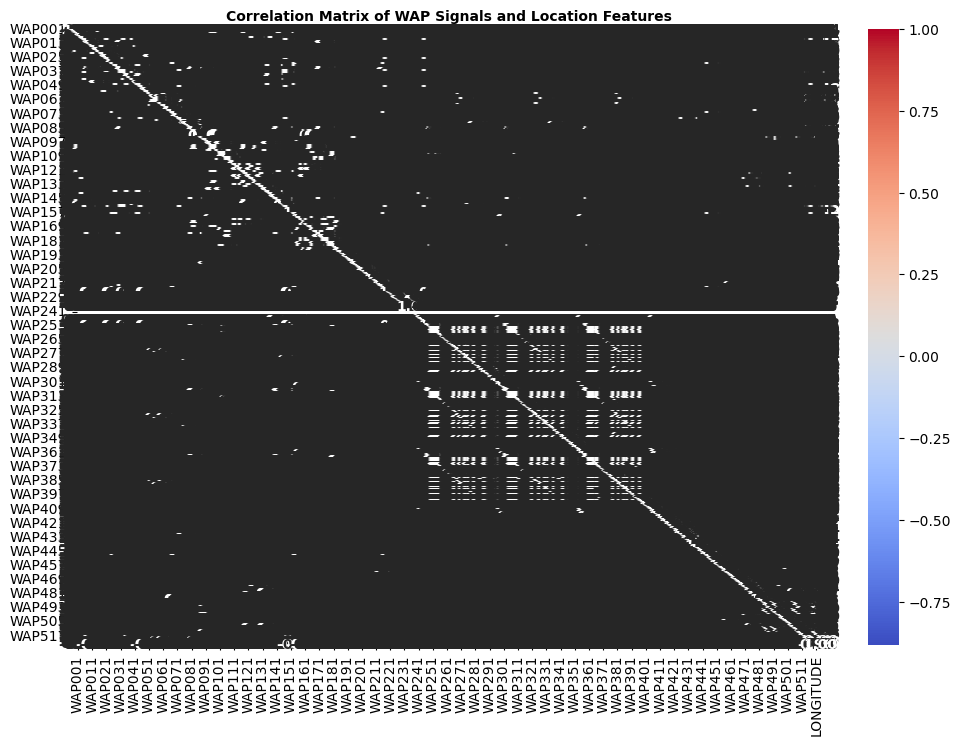

In [6]:
wap_columns = [col for col in data.columns if col.startswith("WAP")]  # All WAP features
location_columns = ["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID"]

# Creating a subset for correlation analysis
corr_df = data[wap_columns + location_columns]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', annot_kws={"size": 10, "weight": "bold"})
plt.title("Correlation Matrix of WAP Signals and Location Features", fontsize=10, fontweight='bold')
plt.show()


Outliers Check

Outliers in LONGITUDE:
 Empty DataFrame
Columns: [WAP001, WAP002, WAP003, WAP004, WAP005, WAP006, WAP007, WAP008, WAP009, WAP010, WAP011, WAP012, WAP013, WAP014, WAP015, WAP016, WAP017, WAP018, WAP019, WAP020, WAP021, WAP022, WAP023, WAP024, WAP025, WAP026, WAP027, WAP028, WAP029, WAP030, WAP031, WAP032, WAP033, WAP034, WAP035, WAP036, WAP037, WAP038, WAP039, WAP040, WAP041, WAP042, WAP043, WAP044, WAP045, WAP046, WAP047, WAP048, WAP049, WAP050, WAP051, WAP052, WAP053, WAP054, WAP055, WAP056, WAP057, WAP058, WAP059, WAP060, WAP061, WAP062, WAP063, WAP064, WAP065, WAP066, WAP067, WAP068, WAP069, WAP070, WAP071, WAP072, WAP073, WAP074, WAP075, WAP076, WAP077, WAP078, WAP079, WAP080, WAP081, WAP082, WAP083, WAP084, WAP085, WAP086, WAP087, WAP088, WAP089, WAP090, WAP091, WAP092, WAP093, WAP094, WAP095, WAP096, WAP097, WAP098, WAP099, WAP100, ...]
Index: []

[0 rows x 529 columns]


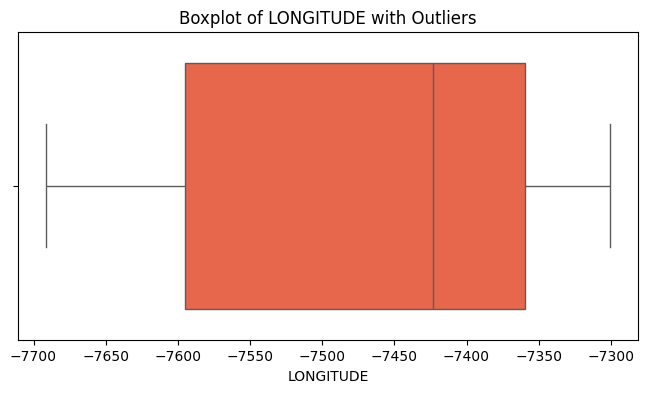

In [6]:
##checking for any outliers 
# Identify outliers in 'LONGITUDE' using the IQR method
Q1 = data['LONGITUDE'].quantile(0.25)
Q3 = data['LONGITUDE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_long = data[(data['LONGITUDE'] < lower_bound) | (data['LONGITUDE'] > upper_bound)]
print("Outliers in LONGITUDE:\n", outliers_long)

# Visualize using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['LONGITUDE'],color='#FF5733')
plt.title("Boxplot of LONGITUDE with Outliers")
plt.show()

In [ ]:
# Identify outliers in 'LONGITUDE' using the IQR method
Q1 = data['LATITUDE'].quantile(0.25)
Q3 = data['LATITUDE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers_long = data[(data['LATITUDE'] < lower_bound) | (data['LATITUDE'] > upper_bound)]
print("Outliers in LATITUDE:\n", outliers_long)

# Visualize using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['LATITUDE'],color='blue')
plt.title("Boxplot of LATITUDE with Outliers")
plt.show()

This visuals indicates that the dataset's spatial attributes (longitude and latitude) fall within expected ranges, with no extreme or abnormal values requiring consideration in further analysis or preprocessing(No Outliers found).

In [ ]:
# Convert TIMESTAMP to datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'], unit='s')

# Extract hour from the timestamp
data['HOUR'] = data['TIMESTAMP'].dt.hour

# Plot the number of observations per hour
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='HOUR',palette="viridis")
plt.title('Number of Observations per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


Purpose of This Step:
*Understand the distribution of observations over time.
*Identify potential biases or missing time periods in the dataset.
*Detect patterns in data collection, such as whether certain hours have more data points than others.

visualizations

In [ ]:
selected_waps = data.iloc[:, :20] # Select a subset of WAP columns for the heatmap

# Calculate correlations and create a heatmap
correlation_matrix = selected_waps.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Wi-Fi Access Points")
plt.show()


Distribution of Floor Levels Across Buildings: This visualization shows the distribution of FLOOR levels across each BUILDINGID. It helps visualize how floors are distributed within buildings, useful for understanding the dataset structure.

This bar chart shows the distribution of samples across different floors in each building. Building 2 has the highest sample count on Floor 3, indicating a focus on data collection at this level, while other buildings have a more even distribution across floors. This insight can guide future data collection efforts and model training for indoor localization on specific floors.

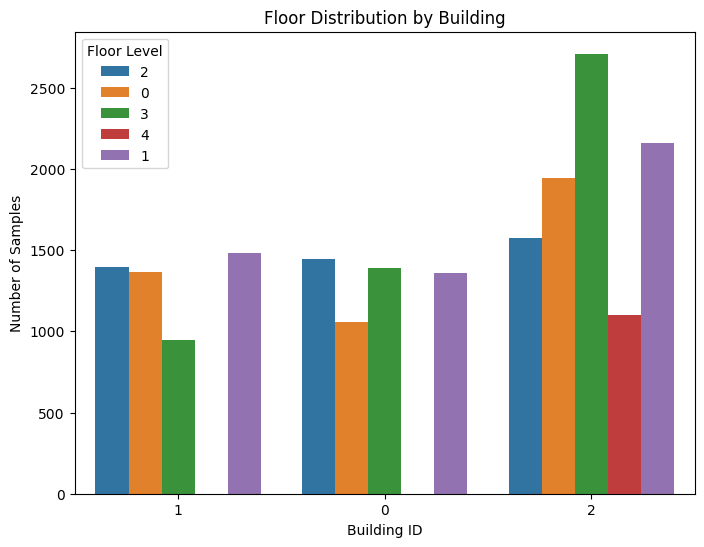

In [7]:
# Create a copy of columns for plotting without changing the original data types
df_plot = data.copy()
df_plot['BUILDINGID'] = df_plot['BUILDINGID'].astype(str)
df_plot['FLOOR'] = df_plot['FLOOR'].astype(str)

# Count of floor levels in each building
plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot, x='BUILDINGID', hue='FLOOR')
plt.title("Floor Distribution by Building")
plt.xlabel("Building ID")
plt.ylabel("Number of Samples")
plt.legend(title="Floor Level")
plt.show()


Pair Plot of Latitude, Longitude, and Building/Floor: A pair plot shows relationships between LATITUDE, LONGITUDE, BUILDINGID, and FLOOR. This plot provides insight into spatial separation between buildings and floors.

This pair plot shows the separation of buildings based on longitude and latitude. Each building has distinct clusters in location data, with minimal overlap, which suggests that longitude and latitude are effective features for distinguishing between buildings. This can help improve indoor localization accuracy by making building identification more straightforward.

In [ ]:
# Select needed columns for the pair plot
plt.figure(figsize=(8, 6))
sns.pairplot(data, vars=['LONGITUDE', 'LATITUDE'], hue='BUILDINGID', palette='pastel', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Longitude and Latitude by Building", y=1.02)
plt.show()


Bar Plot of Average Signal Strength by Building for a Specific WAP: This bar plot shows the average signal strength of a specific WAP for each building. It gives an idea of how signal strength changes across different buildings.

The bar chart shows that the average signal strength of WAP001 is nearly identical across all three buildings, indicating uniform signal coverage or distribution for this WAP across the buildings. This consistency suggests that signal strength does not vary significantly by building location.

In [ ]:
# Example for WAP001 - we can choose another WAP if needed
average_signal_strength = data.groupby('BUILDINGID')['WAP001'].mean()

plt.figure(figsize=(8, 6))
average_signal_strength.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Average Signal Strength of WAP001 by Building")
plt.xlabel("Building ID")
plt.ylabel("Average Signal Strength (dBm)")
plt.show()


Heatmap of Sample Density by Building and Floor: This heatmap shows the density of samples in each building-floor combination. It helps identify where most samples are concentrated.

The heatmap shows sample density by building and floor, with Building ID 2, Floor 3, having the highest sample count. This suggests greater data collection efforts on that specific floor compared to others across the buildings.

In [ ]:
# Create a pivot table for counting samples by building and floor
heatmap_data = data.pivot_table(index='FLOOR', columns='BUILDINGID', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar_kws={'label': 'Sample Count'})
plt.title("Sample Density by Building and Floor")
plt.xlabel("Building ID")
plt.ylabel("Floor Level")
plt.show()


Box Plot of Longitude by Building: This box plot displays the distribution of LONGITUDE values by building. It shows the longitude range of each building, indicating relative building positions.

The data comes from three distinct buildings located at different longitudes (approximately -7650, -7500, and -7350), with Building 1 showing the largest spread in longitude values.

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='BUILDINGID', y='LONGITUDE', palette='coolwarm')
plt.title("Distribution of Longitude by Building")
plt.xlabel("Building ID")
plt.ylabel("Longitude")
plt.show()


Signal Strength Heatmap for Selected WAPs: A heatmap showing signal strengths of a few WAPs across samples. This helps visualize signal variability between WAPs.

Shows signal strength measurements across 10 different WiFi access points (WAP001-WAP010), with darker blue indicating stronger signals, and reveals patterns of coverage across different sample locations.

In [ ]:
# Select a subset of WAPs for visualization (First 10 WAPs)
selected_waps = data.iloc[:, 0:10]

plt.figure(figsize=(8, 6))
sns.heatmap(selected_waps, cmap="Blues", cbar_kws={'label': 'Signal Strength (dBm)'})
plt.title("Signal Strengths Heatmap for Selected WAPs")
plt.xlabel("WAP Index")
plt.ylabel("Sample Index")
plt.show()
